In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from scipy.stats import linregress
from statistics import mean

In [2]:
ls

1533148642_test.csv
1533148642_train.csv
HackDay2.ipynb
My_Prediction.csv
README.md
data_description.txt*
house-prices-advanced-regression-techniques/
house-prices-advanced-regression-techniques.zip
sample_submission.csv*


In [3]:
df_test = pd.read_csv("1533148642_test.csv")

In [4]:
df_test.shape

(1459, 80)

In [5]:
df_train = pd.read_csv("1533148642_train.csv")

In [6]:
df_train.shape

(1460, 81)

In [7]:
Trainingdatasize = df_test.shape[0]

In [8]:
Trainingdatasize

1459

In [9]:
#df = df_test.append(df_train)

In [10]:
df = df_train

In [11]:
df[df.duplicated() ==  True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
for elem in df: print(elem, '\t\t', df[elem].isnull().sum())

Id 		 0
MSSubClass 		 0
MSZoning 		 0
LotFrontage 		 259
LotArea 		 0
Street 		 0
Alley 		 1369
LotShape 		 0
LandContour 		 0
Utilities 		 0
LotConfig 		 0
LandSlope 		 0
Neighborhood 		 0
Condition1 		 0
Condition2 		 0
BldgType 		 0
HouseStyle 		 0
OverallQual 		 0
OverallCond 		 0
YearBuilt 		 0
YearRemodAdd 		 0
RoofStyle 		 0
RoofMatl 		 0
Exterior1st 		 0
Exterior2nd 		 0
MasVnrType 		 8
MasVnrArea 		 8
ExterQual 		 0
ExterCond 		 0
Foundation 		 0
BsmtQual 		 37
BsmtCond 		 37
BsmtExposure 		 38
BsmtFinType1 		 37
BsmtFinSF1 		 0
BsmtFinType2 		 38
BsmtFinSF2 		 0
BsmtUnfSF 		 0
TotalBsmtSF 		 0
Heating 		 0
HeatingQC 		 0
CentralAir 		 0
Electrical 		 1
1stFlrSF 		 0
2ndFlrSF 		 0
LowQualFinSF 		 0
GrLivArea 		 0
BsmtFullBath 		 0
BsmtHalfBath 		 0
FullBath 		 0
HalfBath 		 0
BedroomAbvGr 		 0
KitchenAbvGr 		 0
KitchenQual 		 0
TotRmsAbvGrd 		 0
Functional 		 0
Fireplaces 		 0
FireplaceQu 		 690
GarageType 		 81
GarageYrBlt 		 81
GarageFinish 		 81
GarageCars 		 0
GarageArea 	

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [16]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
df['Id'].value_counts()

1460    1
479     1
481     1
482     1
483     1
       ..
976     1
977     1
978     1
979     1
1       1
Name: Id, Length: 1460, dtype: int64

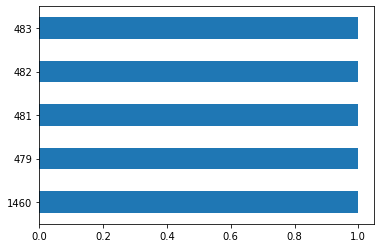

In [18]:
df['Id'].value_counts().head().plot(kind='barh')

In [19]:
abs(df.corr()['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
OverallCond      0.077856
MSSubClass       0.084284
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
Name: SalePr

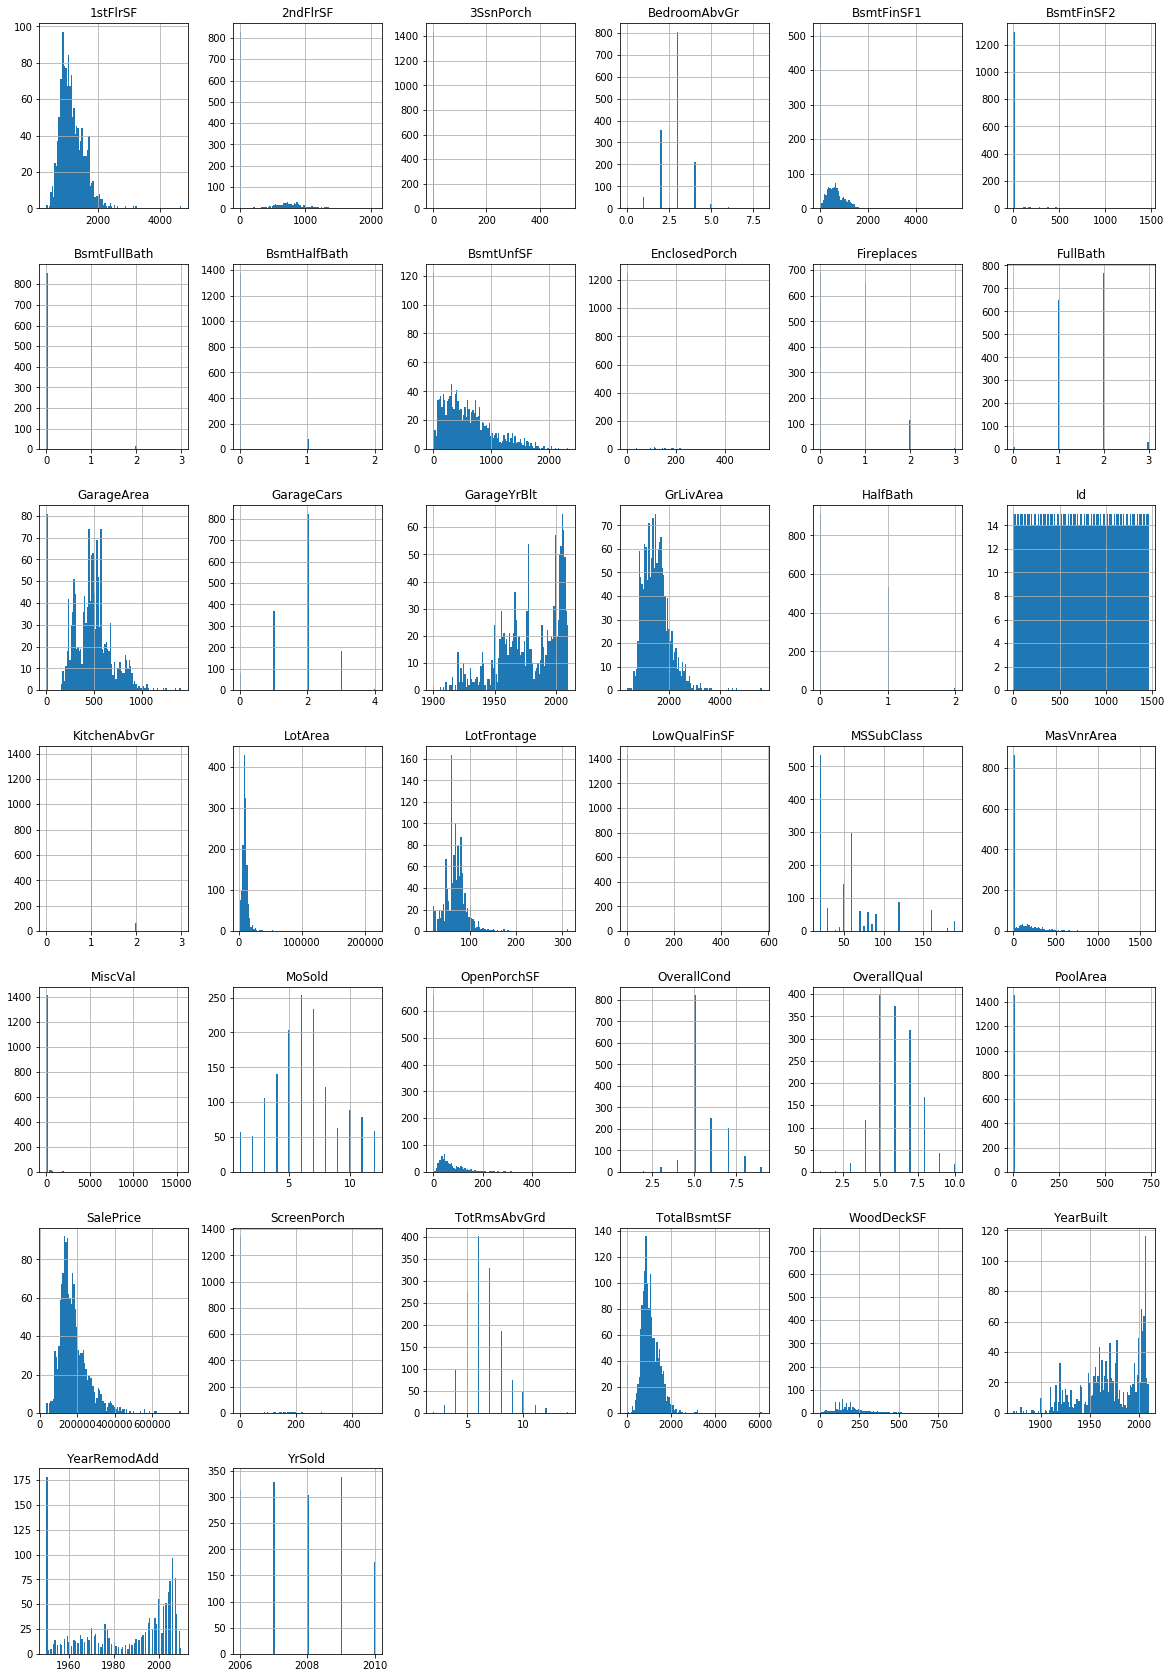

In [20]:
%matplotlib inline
df.hist(bins=100, figsize=(20,30))
plt.show()

In [21]:
def getline(x, y, x2, y2, name_x, name_y):
    
    m, b, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    y_pred = m*x+b
    
    m2, b2, r_value2, p_value, std_err = scipy.stats.linregress(x2, y2)
    y_pred2 = m2*x2+b2
    
    plt.scatter(x, y)
    plt.scatter(x2, y2)
    plt.plot(x, y_pred, 'r')
    plt.plot(x2, y_pred2, 'g')
    plt.legend(['($r^2=$ {:.2f})'.format(r_value), 
                '($r^2=$ {:.2f})'.format(r_value2)],
            loc='best')
    
    plt.ylabel(name_y, fontsize=13)
    plt.xlabel(name_x, fontsize=13)
    plt.title(name_x +' vs '+ name_y)
    
    


In [22]:
df1 = df

In [23]:
def plotcorr():

    fig1 = plt.figure(figsize = (25,20))

    a = fig1.add_subplot(331)
    getline(df['1stFlrSF'], df['SalePrice'], df1['1stFlrSF'], df1['SalePrice'], '1stFlrSF', 'SalePrice')

    b = fig1.add_subplot(332)
    getline(df['OverallQual'],df['SalePrice'], df1['OverallQual'],df1['SalePrice'], 'OverallQual', 'SalePrice')

    c = fig1.add_subplot(333)
    getline(df['BsmtFinSF1'], df['SalePrice'], df1['BsmtFinSF1'], df1['SalePrice'], 'BsmtFinSF1', 'SalePrice')

    d = fig1.add_subplot(334)
    getline(df['BsmtUnfSF'], df['SalePrice'], df1['BsmtUnfSF'], df1['SalePrice'], 'BsmtUnfSF', 'SalePrice')

    e = fig1.add_subplot(335)
    getline(df['GarageArea'],df['SalePrice'],  df1['GarageArea'], df1['SalePrice'], 'GarageArea', 'SalePrice')

    f = fig1.add_subplot(336)
    getline(df['GrLivArea'], df['SalePrice'], df1['GrLivArea'], df1['SalePrice'], 'GrLivArea', 'SalePrice')

    g = fig1.add_subplot(337)
    getline(df['LotArea'], df['SalePrice'], df1['LotArea'], df1['SalePrice'], 'LotArea', 'SalePrice')

    h = fig1.add_subplot(338)
    getline(df['LotFrontage'],df['SalePrice'], df1['LotFrontage'], df1['SalePrice'], 'LotFrontage', 'SalePrice')

    i = fig1.add_subplot(339)
    getline(df['MasVnrArea'],df['SalePrice'], df1['MasVnrArea'], df1['SalePrice'], 'MasVnrArea', 'SalePrice')

    fig2 = plt.figure(figsize = (25,5))
    a = fig2.add_subplot(131)
    getline(df['OpenPorchSF'], df['SalePrice'],df1['OpenPorchSF'], df1['SalePrice'], 'OpenPorchSF', 'SalePrice')

    b = fig2.add_subplot(132)
    getline(df['TotalBsmtSF'],df['SalePrice'], df1['TotalBsmtSF'], df1['SalePrice'], 'TotalBsmtSF', 'SalePrice')

    c = fig2.add_subplot(133)
    getline(df['WoodDeckSF'],df['SalePrice'], df1['WoodDeckSF'], df1['SalePrice'], 'WoodDeckSF', 'SalePrice')


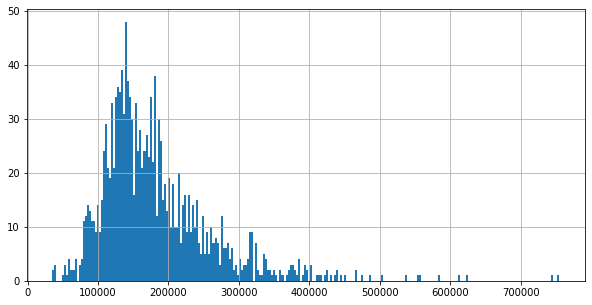

In [24]:
df['SalePrice'].hist(bins=250, figsize=(10,5))

In [25]:
df['SalePrice'] = np.log(df['SalePrice'])

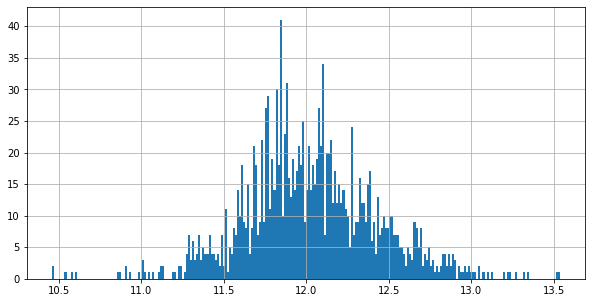

In [26]:
df['SalePrice'].hist(bins=250, figsize=(10,5))

In [27]:
outliers = df.quantile(.97)
#df1 = df1[(df1['1stFlrSF']<outliers['1stFlrSF'])]
#df1 = df1[(df1['2ndFlrSF']<outliers['2ndFlrSF'])]
#df1 = df1[(df1['LotArea']<outliers['LotArea'])]
#df1 = df1[(df1['BsmtFinSF1']<outliers['BsmtFinSF1'])]
#df1 = df1[(df1['GrLivArea']<outliers['GrLivArea'])]
#df1 = df1[(df1['TotalBsmtSF']<outliers['TotalBsmtSF'])]
#df1 = df1[(df1['OpenPorchSF']<outliers['OpenPorchSF'])]

In [28]:
df1 = df1[df1['1stFlrSF'] < 3000]
df1 = df1[df1['LotArea'] < 100000]
df1 = df1[df1['GarageArea'] < 1200]
df1 = df1[df1['LotFrontage'] < 300]

In [29]:
df1['LotFrontage'] = df1['LotFrontage'].fillna(df1['LotFrontage'].median())
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].median())
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(df1['MasVnrArea'].median())
df1['BsmtFinSF1'] = df1['BsmtFinSF1'].fillna(df1['BsmtFinSF1'].median())
df1['BsmtFinSF2'] = df1['BsmtFinSF2'].fillna(df1['BsmtFinSF2'].median())
df1['BsmtFullBath'] = df1['BsmtFullBath'].fillna(df1['BsmtFullBath'].median())
df1['BsmtHalfBath'] = df1['BsmtHalfBath'].fillna(df1['BsmtHalfBath'].median())
df1['BsmtUnfSF'] = df1['BsmtUnfSF'].fillna(df1['BsmtUnfSF'].median())
df1['GarageArea'] = df1['GarageArea'].fillna(df1['GarageArea'].median())
df1['GarageCars'] = df1['GarageCars'].fillna(df1['GarageCars'].median())
df1['TotalBsmtSF'] = df1['TotalBsmtSF'].fillna(df1['TotalBsmtSF'].median())

In [30]:
df1['LotArea'] = np.log(df1['LotArea']+1)

In [ ]:
plotcorr()

In [ ]:
abs(df1.corr()['SalePrice'].sort_values(ascending = False))

In [ ]:
%matplotlib inline
df1.hist(bins=100, figsize=(20,30))
plt.show()

In [ ]:
df1 = df.select_dtypes(exclude=['object'])
df2 = df.select_dtypes(include=['object'])

In [ ]:
df1.duplicated().sum()

In [ ]:
df1.isnull().sum()

In [ ]:
df1.head()

In [ ]:
df1.info()

In [ ]:
df1.isnull().sum()

In [ ]:
df1.isnull().sum().sum()

In [ ]:
%matplotlib inline
df1.hist(bins=100, figsize=(25,15))
plt.show()

In [ ]:
df1.head()

In [ ]:
df2.shape

In [ ]:
df2.isnull().sum()

In [ ]:
df2 = df2.drop(['MiscFeature'], axis = 1)

In [ ]:
df2['Alley'] = df2['Alley'].fillna('No Alley Access')
df2['Fence'] = df2['Fence'].fillna('No Fence')
df2['BsmtCond'] = df2['BsmtCond'].fillna('No Basement')
df2['BsmtExposure'] = df2['BsmtExposure'].fillna('No Basement')
df2['BsmtFinType1'] = df2['BsmtFinType1'].fillna('No Basement')
df2['BsmtFinType2'] = df2['BsmtFinType2'].fillna('No Basement')
df2['BsmtQual'] = df2['BsmtQual'].fillna('No Basement')
#df2['FireplaceQu'] = df2['FireplaceQu'].fillna('No Fireplace')
df2['GarageCond'] = df2['GarageCond'].fillna('No Garage')
df2['GarageFinish'] = df2['GarageFinish'].fillna('No Garage')
df2['GarageQual'] = df2['GarageQual'].fillna('No Garage')
df2['GarageType'] = df2['GarageType'].fillna('No Garage')
df2['PoolQC'] = df2['PoolQC'].fillna('No Pool')
df2['FireplaceQu'] = df2['FireplaceQu'].fillna('No Fireplace')

In [ ]:
for column in df2:
    try:
        df2[column] = df2[column].fillna(df2[column].value_counts()[0])
    except:
        pass

In [ ]:
df2.isnull().sum()

In [ ]:
#Replacing MSSubClass
MSSubClassin = [20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190]
MSSubClassout = ['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES',
            '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER', '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL',
             'SPLIT FOYER', 'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '1-1/2 STORY PUD - ALL AGES',
              '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES']

In [ ]:
#df1['MSSubClass'] = df1['MSSubClass'].replace(MSSubClassin, MSSubClassout)

In [ ]:
df1 = pd.concat([df1, df2],axis=1)

In [ ]:
df1 = pd.get_dummies(df1, drop_first=True)

In [ ]:
df1.head()

In [ ]:
df1.shape

In [ ]:
abs(df1.corr()['SalePrice'].sort_values(ascending = False))

In [ ]:
#df1 = df1.drop('MSSubClass_1-1/2 STORY PUD - ALL AGES',axis=1)

In [ ]:
new_train = df1[Trainingdatasize:]
new_test = df1[:Trainingdatasize]

In [ ]:
new_test.isnull().sum().sum()

In [ ]:
new_train.isnull().sum().sum()

In [ ]:
df

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd


def OptimalRegression(dataset, y_name):
    
    r = Ridge()
    l = Lasso()
    e = ElasticNet()
    et = ExtraTreeRegressor()
    gbr = GradientBoostingRegressor()
    
    x = dataset.drop(y_name,axis = 1) 
    y = dataset[y_name]
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)
    
    algos = [r, l, e, et, gbr]
    algo_names = ['Ridge', 'Lasso','ElasticNet','Extra Tree','Gradient Boost']
    
    result = pd.DataFrame(columns = ['Mean Squared Error', 'R2'], index = algo_names)
    
    meansquarederror = []
    r2 = []
    largest_r2 = 0
    bestmodel = 0
    
    for algo in algos:
        algo.fit(x_train,y_train)
        algo.predict(x_test)
        
        meansquarederror.append(mean_squared_error(y_test, algo.predict(x_test)))
        r2val = r2_score(y_test, algo.predict(x_test))
        r2.append(r2val)
        if(r2val > largest_r2):
            largest_r2 = r2val
            bestmodel = algo
        
    result['Mean Squared Error'] = meansquarederror
    result['R2'] = r2
    
    stats = result.sort_values('R2', ascending = False)
    
    return bestmodel, stats



In [ ]:
model, stats = OptimalRegression(new_train,'SalePrice')
stats

In [ ]:
new_test['SalePrice'] = model.predict(new_test.drop('SalePrice', axis=1))

In [ ]:
out_df = new_test[['Id','SalePrice']]

In [ ]:
out_df.head()

In [ ]:
out_df.to_csv("My_Prediction.csv",index = False)

In [ ]:
ls

In [ ]:
out_df.shape